In [129]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [130]:
carseats_train = pd.read_csv('Carseats_train.csv') # ,sep=';')
carseats_test = pd.read_csv('Carseats_test.csv') # ,sep=';'

In [131]:
#df = pd.read_csv('winequality-red.csv') # ,sep=';')
#df.shape
#df.columns
#df['quality'] = df['quality'].astype(int)
#df.head()
#df['quality'].hist()


In [132]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

#Y = df['quality']
#X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']]
carseats_train.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [133]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

Y_train = carseats_train["Price"]
X_train = carseats_train[['Sales', 'CompPrice', 'Income', 'Advertising',
       'Population','ShelveLoc', 'Age', 'Education', 'Urban', 'US']]


Y_test = carseats_test["Price"]
X_test = carseats_test[['Sales', 'CompPrice', 'Income', 'Advertising',
       'Population','ShelveLoc', 'Age', 'Education', 'Urban', 'US']]


X_train["ShelveLocgood"] = 0
X_train["ShelveLocmedium"] = 0
X_train["USyes"] = 0
X_train["Urbanyes"] = 0

X_train.loc[X_train["ShelveLoc"] == "Good", "ShelveLocgood"] = 1
X_train.loc[X_train["ShelveLoc"] == "Medium", "ShelveLocmedium"] = 1
X_train.loc[X_train["Urban"] == "Yes", "Urbanyes"] = 1
X_train.loc[X_train["US"] == "Yes", "USyes"] = 1

X_train.drop(['ShelveLoc'], axis= 1, inplace = True)
X_train.drop(['Urban'], axis= 1, inplace = True)
X_train.drop(['US'], axis= 1, inplace = True)
display(X_train.head())



X_test["ShelveLocgood"] = 0
X_test["ShelveLocmedium"] = 0
X_test["USyes"] = 0
X_test["Urbanyes"] = 0

X_test.loc[X_test["ShelveLoc"] == "Good", "ShelveLocgood"] = 1
X_test.loc[X_test["ShelveLoc"] == "Medium", "ShelveLocmedium"] = 1
X_test.loc[X_test["Urban"] == "Yes", "Urbanyes"] = 1
X_test.loc[X_test["US"] == "Yes", "USyes"] = 1

X_test.drop(['ShelveLoc'], axis= 1, inplace = True)
X_test.drop(['Urban'], axis= 1, inplace = True)
X_test.drop(['US'], axis= 1, inplace = True)
display(X_test.head())

ShelveLocgood = X_train["ShelveLocgood"]
ShelveLocmedium = X_train["ShelveLocmedium"]
USyes = X_train["USyes"]
Urbanyes = X_train["Urbanyes"]

X_train.drop(['ShelveLocgood'], axis= 1, inplace = True)
X_train.drop(['ShelveLocmedium'], axis= 1, inplace = True)
X_train.drop(['USyes'], axis= 1, inplace = True)
X_train.drop(['Urbanyes'], axis= 1, inplace = True)


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ("Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"))

X_train["ShelveLocgood"] = ShelveLocgood
X_train["ShelveLocmedium"] = ShelveLocmedium
X_train["USyes"] = USyes
X_train["Urbanyes"] = Urbanyes

display(X_train)


ShelveLocgood = X_test["ShelveLocgood"]
ShelveLocmedium = X_test["ShelveLocmedium"]
USyes = X_test["USyes"]
Urbanyes = X_test["Urbanyes"]

X_test.drop(['ShelveLocgood'], axis= 1, inplace = True)
X_test.drop(['ShelveLocmedium'], axis= 1, inplace = True)
X_test.drop(['USyes'], axis= 1, inplace = True)
X_test.drop(['Urbanyes'], axis= 1, inplace = True)


#####################


scaler = preprocessing.StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ("Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"))

X_test["ShelveLocgood"] = ShelveLocgood
X_test["ShelveLocmedium"] = ShelveLocmedium
X_test["USyes"] = USyes
X_test["Urbanyes"] = Urbanyes

display(X_test)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,9.50,138,73,11,276,42,17,0,0,1,1
1,11.22,111,48,16,260,65,10,1,0,1,1
2,10.06,113,35,10,269,59,12,0,1,1,1
3,7.40,117,100,4,466,55,14,0,1,1,1
4,4.15,141,64,3,340,38,13,0,0,0,1



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,2.86,121,86,10,496,51,10,0,0,1,1
1,11.19,122,69,7,303,45,16,1,0,1,0
2,7.74,150,96,0,80,61,11,1,0,0,1
3,5.36,135,110,0,112,80,16,0,1,0,0
4,6.97,106,46,11,414,79,17,0,0,0,0


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,0.770009,0.882600,0.112058,0.834975,0.113472,-0.693325,1.118922,0,0,1,1
1,1.377211,-0.880268,-0.788521,1.647886,0.004500,0.715641,-1.507530,1,0,1,1
2,0.967703,-0.749685,-1.256823,0.672393,0.065797,0.348085,-0.757115,0,1,1,1
3,0.028658,-0.488520,1.084683,-0.303100,1.407521,0.103047,-0.006700,0,1,1,1
4,-1.118671,1.078474,-0.212151,-0.465682,0.549362,-0.938362,-0.381908,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
275,-0.229050,-1.141434,1.769124,0.834975,-0.336039,-0.019472,-1.132322,0,1,1,1
276,-0.137263,0.686726,-0.032035,1.322722,0.249688,1.205716,0.368507,0,1,1,1
277,0.169868,0.752017,-0.788521,0.997557,0.454011,-1.060881,0.743715,0,1,1,1
278,-0.034886,-0.684394,1.552985,-0.628264,-0.887712,-0.815844,0.368507,1,0,1,0


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,-1.837914,-0.336020,0.717326,0.212877,1.482726,-0.147316,-1.461617,0,0,1,1
1,1.193434,-0.270455,0.114133,-0.194760,0.171991,-0.526129,0.957611,1,0,1,0
2,-0.062046,1.565360,1.072145,-1.145911,-1.342484,0.484039,-1.058413,1,0,0,1
3,-0.928146,0.581888,1.568891,-1.145911,-1.125160,1.683614,0.957611,0,1,0,0
4,-0.342255,-1.319492,-0.701950,0.348756,0.925833,1.620478,1.360816,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
115,1.695626,0.778582,1.497928,1.164029,-0.507145,-1.283755,0.151202,1,0,1,1
116,-0.644298,0.844147,-1.518034,-0.738275,-1.634513,0.105226,-1.058413,0,1,1,0
117,-0.182136,2.352138,-1.411588,0.484634,0.613430,-0.841807,1.764021,0,1,1,1
118,-0.717080,-1.712881,0.468952,-0.194760,0.042955,-0.210452,-0.655208,0,0,1,1


In [134]:
X_test.shape


(120, 11)

In [135]:
X_test.mean()


Sales              3.700743e-17
CompPrice          0.000000e+00
Income             4.070818e-17
Advertising       -2.220446e-17
Population        -6.661338e-17
Age               -1.628327e-16
Education          1.480297e-17
ShelveLocgood      2.666667e-01
ShelveLocmedium    5.000000e-01
USyes              7.083333e-01
Urbanyes           7.416667e-01
dtype: float64

In [136]:
X_test.iloc[10,:]


Sales              0.574792
CompPrice         -1.253927
Income             1.604373
Advertising        0.756392
Population         0.830754
Age               -0.778671
Education         -1.058413
ShelveLocgood      0.000000
ShelveLocmedium    1.000000
USyes              1.000000
Urbanyes           0.000000
Name: 10, dtype: float64

In [137]:
#rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
#rf.fit(X_train, Y_train)  
#print(rf.feature_importances_)
#
#importances = rf.feature_importances_
#indices = np.argsort(importances)
#
#features = X_train.columns
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

In [138]:
X_test[0:1]


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,-1.837914,-0.33602,0.717326,0.212877,1.482726,-0.147316,-1.461617,0,0,1,1


In [139]:
#import shap
#shap.initjs()
#rf_explainer = shap.KernelExplainer(rf.predict, X_test)
#rf_shap_values = rf_explainer.shap_values(X_test)

In [140]:
#rf_explainer(X_test)


In [141]:
#rf_shap_values


In [142]:
#rf_explainer.expected_value


In [143]:
#X_test.iloc[10,:] , rf_shap_values[10,:]

In [144]:
#shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")


In [145]:
#shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)


In [146]:
#shap.summary_plot(rf_shap_values, X_test, plot_type="bar")


In [147]:
#shap.summary_plot(rf_shap_values, X_test)


In [148]:
#shap.dependence_plot("alcohol", rf_shap_values, X_test)


In [149]:
X_train


,Sales,CompPrice,Income,Advertising,Population,Age,Education,ShelveLocgood,ShelveLocmedium,USyes,Urbanyes
0,0.770009,0.882600,0.112058,0.834975,0.113472,-0.693325,1.118922,0,0,1,1
1,1.377211,-0.880268,-0.788521,1.647886,0.004500,0.715641,-1.507530,1,0,1,1
2,0.967703,-0.749685,-1.256823,0.672393,0.065797,0.348085,-0.757115,0,1,1,1
3,0.028658,-0.488520,1.084683,-0.303100,1.407521,0.103047,-0.006700,0,1,1,1
4,-1.118671,1.078474,-0.212151,-0.465682,0.549362,-0.938362,-0.381908,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
275,-0.229050,-1.141434,1.769124,0.834975,-0.336039,-0.019472,-1.132322,0,1,1,1
276,-0.137263,0.686726,-0.032035,1.322722,0.249688,1.205716,0.368507,0,1,1,1
277,0.169868,0.752017,-0.788521,0.997557,0.454011,-1.060881,0.743715,0,1,1,1
278,-0.034886,-0.684394,1.552985,-0.628264,-0.887712,-0.815844,0.368507,1,0,1,0


In [158]:
from sklearn import svm
svm = svm.LinearSVR(C = 100, max_iter = 5000)
svm.fit(X_train, Y_train)  

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


LinearSVR(C=100, max_iter=5000)

In [162]:
sum(((Y_test - svm.predict(X_test))**2))/len(Y_test)

109.61079464822183

In [163]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [02:00<00:00,  1.00s/it]


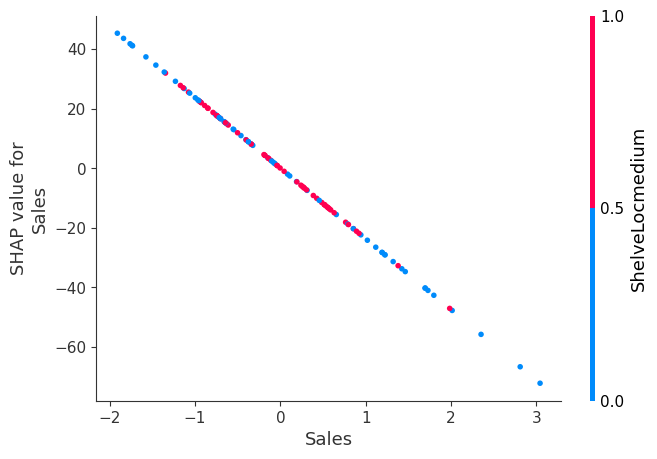

In [164]:
shap.dependence_plot("Sales", svm_shap_values, X_test)


In [165]:
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 


In [166]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


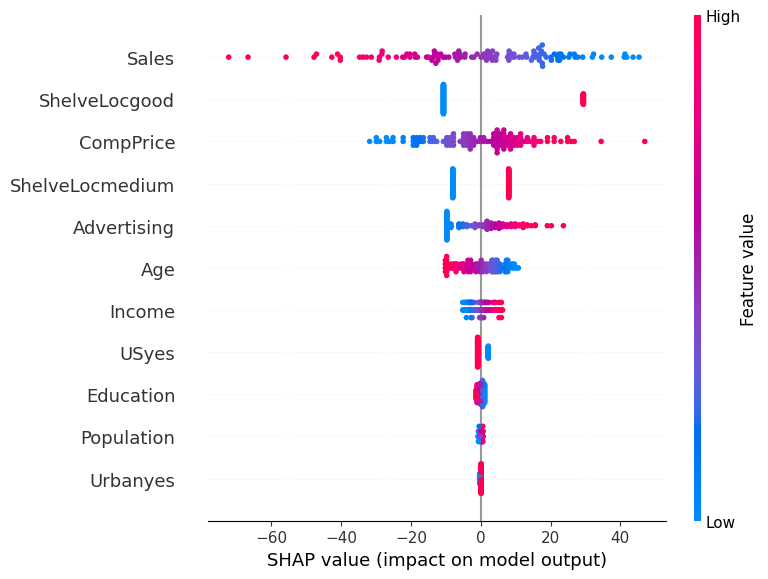

In [167]:
shap.summary_plot(svm_shap_values, X_test)
